In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv(r"C:\Users\Anshu Kumar\OneDrive\Documents\project\datasets\Countries_Population.csv")

#Data cleaning
df.info()
df=df.drop_duplicates()
df.dropna(inplace=True)


print("After cleaning: \n")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4195 non-null   int64  
 1   Country                         4195 non-null   object 
 2   Population                      4195 non-null   int64  
 3   Yearly % Change                 4195 non-null   float64
 4   Yearly Change                   4195 non-null   int64  
 5   Migrants (net)                  3600 non-null   float64
 6   Median Age                      3600 non-null   float64
 7   Fertility Rate                  3600 non-null   float64
 8   Density (P/Km²)                 4195 non-null   object 
 9   Urban Pop %                     4082 non-null   float64
 10  Urban Population                4082 non-null   float64
 11  Country's Share of World Pop %  4195 non-null   float64
 12  World Population                41

              Year    Population  Yearly % Change  Yearly Change  \
count  3552.000000  3.552000e+03      3552.000000   3.552000e+03   
mean   1993.937218  2.878927e+07         1.758232   3.892415e+05   
std      21.732372  1.154662e+08         1.509316   1.442156e+06   
min    1955.000000  1.898500e+04        -5.180000  -6.730240e+05   
25%    1975.000000  1.117492e+06         0.730000   6.860000e+03   
50%    1995.000000  5.282247e+06         1.675000   6.208900e+04   
75%    2016.000000  1.751240e+07         2.650000   2.794690e+05   
max    2020.000000  1.439324e+09        18.510000   2.067648e+07   

       Migrants (net)   Median Age  Fertility Rate  Urban Pop %  \
count    3.552000e+03  3552.000000     3552.000000  3552.000000   
mean     2.690017e+02    25.335107        3.915093    50.735389   
std      1.057769e+05     8.148503        1.983896    24.669646   
min     -1.077397e+06    14.400000        0.850000     1.900000   
25%     -1.285550e+04    18.400000        2.100000  

Text(0.5, 1.0, 'World Population Over Time')

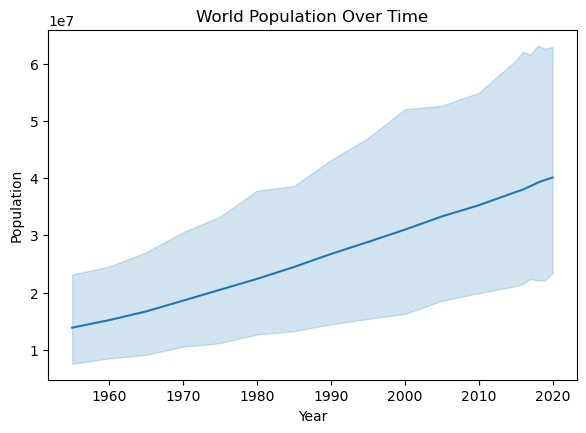

In [12]:
#Exploratory data analysis

print(df.describe())

# EDA using Visualization
plt.figure(figsize=(15, 10))

# Population trends over time
plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='Population', data=df)
plt.title('World Population Over Time')


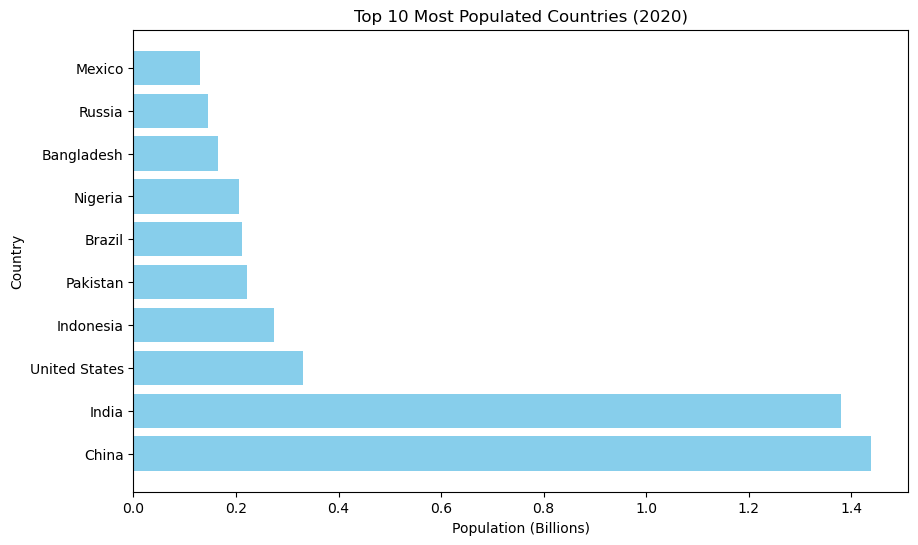

In [24]:
top_10 = df[df['Year'] == 2020].sort_values('Population', ascending=False).head(10)

# Create plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['Country'], top_10['Population']/1e9, color='skyblue')  # Convert to billions


plt.title('Top 10 Most Populated Countries (2020)')
plt.xlabel('Population (Billions)')
plt.ylabel('Country')


plt.show()

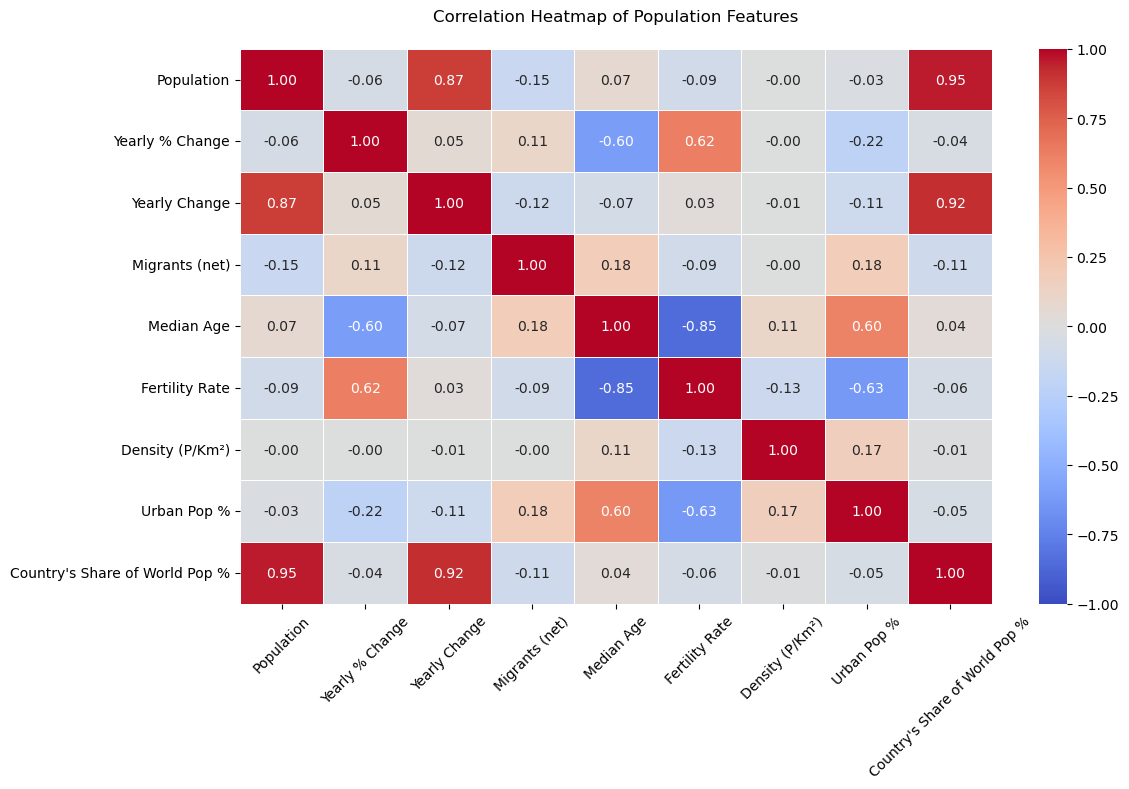

In [25]:
numeric_cols = ['Population', 'Yearly % Change', 'Yearly Change', 
               'Migrants (net)', 'Median Age', 'Fertility Rate',
               'Density (P/Km²)', 'Urban Pop %', 'Country\'s Share of World Pop %']
for col in numeric_cols:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.replace(',', '').astype(float)
# Calculate correlations
corr_matrix = df[numeric_cols].corr()
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Population Features', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

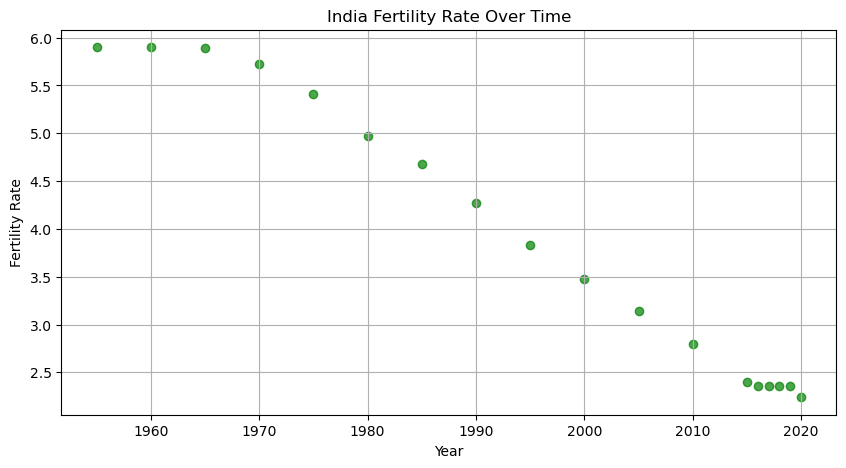

In [35]:
india = df[df['Country'] == 'India']
plt.figure(figsize=(10, 5))
plt.scatter(
    india['Year'], 
    india['Fertility Rate'],
    c='green',
    alpha=0.7
)
plt.title('India Fertility Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.grid(True)
plt.show()

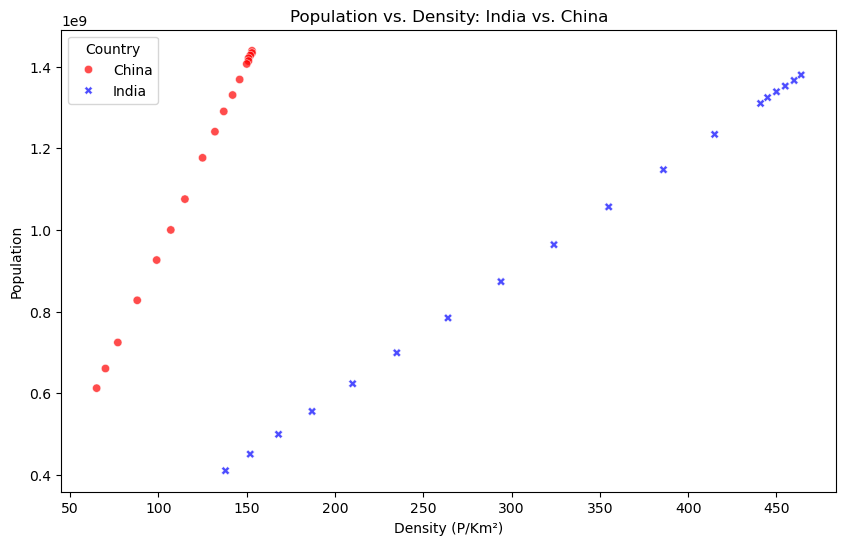

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Density (P/Km²)', 
    y='Population', 
    hue='Country',  # Color by country
    style='Country',  # Different markers
    data=df[df['Country'].isin(['India', 'China'])],
    palette={'India':'blue', 'China':'red'},
    alpha=0.7
)
plt.title('Population vs. Density: India vs. China')
plt.legend(title='Country')
plt.show()


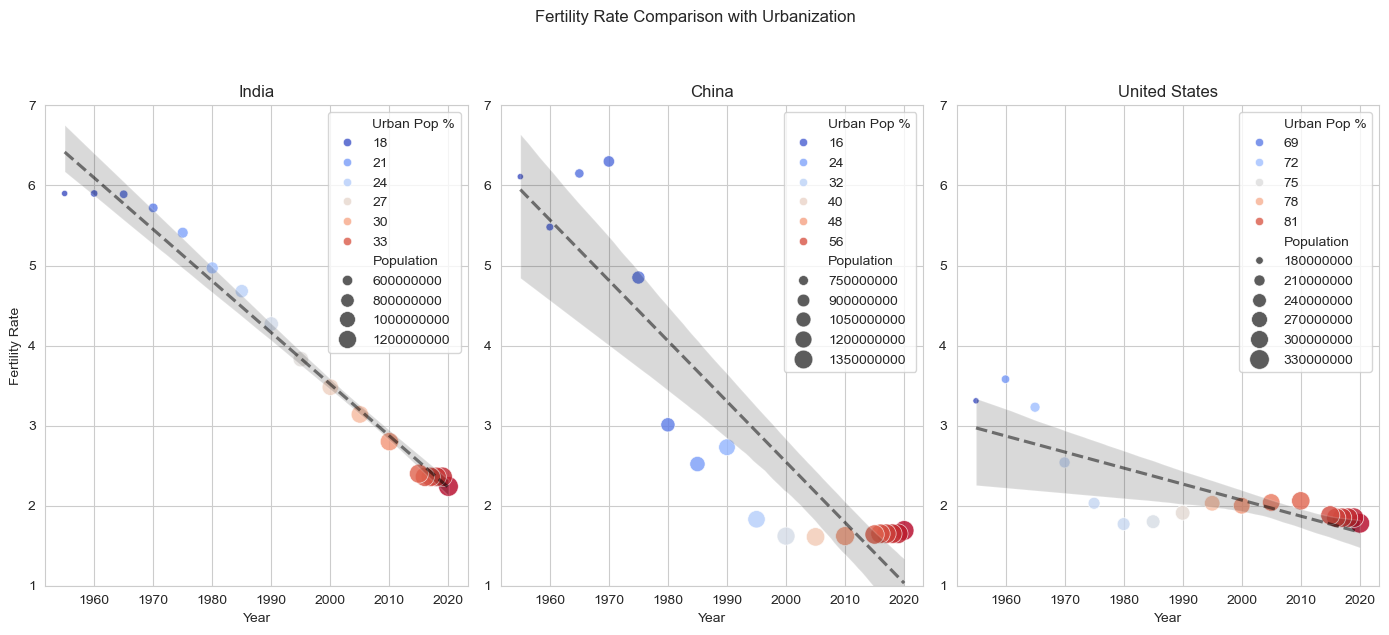

In [49]:
plt.figure(figsize=(14, 6))

# subplots
for i, country in enumerate(countries, 1):
    plt.subplot(1, 3, i)
    country_data = df_compare[df_compare['Country'] == country]
    
    sns.scatterplot(
        x='Year',
        y='Fertility Rate',
        data=country_data,
        hue='Urban Pop %',
        palette='coolwarm',
        size='Population',
        sizes=(20, 200),
        alpha=0.8
    )
    sns.regplot(
        x='Year',
        y='Fertility Rate',
        data=country_data,
        scatter=False,
        color='black',
        line_kws={'linestyle':'--', 'alpha':0.5}
    )
    
    plt.title(country)
    plt.ylim(1, 7)
    if i != 1:
        plt.ylabel('')
    
plt.suptitle('Fertility Rate Comparison with Urbanization', y=1.05)
plt.tight_layout()
plt.show()

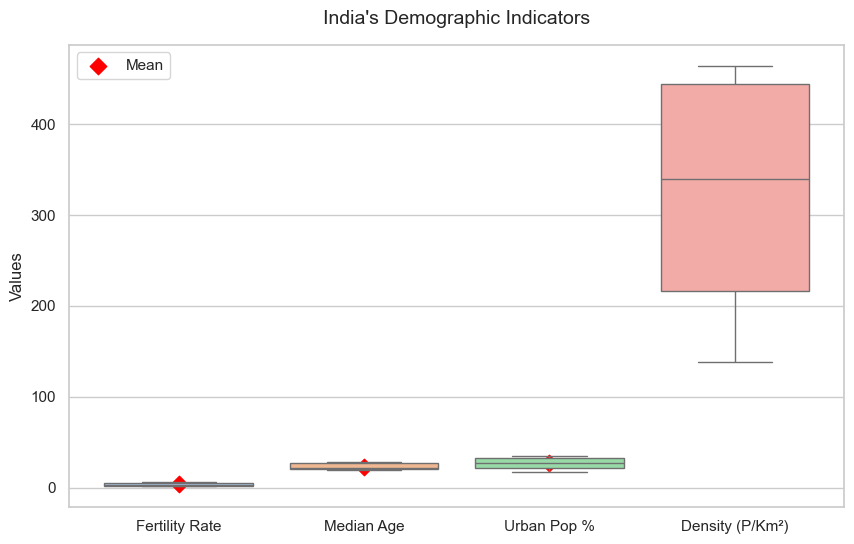

In [57]:


# Filter data for India
india = df[df['Country'] == 'India']


plt.figure(figsize=(10, 6))

metrics = ['Fertility Rate', 'Median Age', 'Urban Pop %', 'Density (P/Km²)']
sns.boxplot(data=india[metrics], palette="pastel")

plt.title("India's Demographic Indicators", fontsize=14, pad=15)
plt.ylabel("Values")
# plt.xticks(rotation=45)


for i, metric in enumerate(metrics):
    mean_val = india[metric].mean()
    plt.scatter(i, mean_val, color='red', marker='D', s=70, label='Mean' if i==0 else "")


plt.legend()
plt.show()

In [53]:
# Linear Regression (y = mx + c)
from sklearn.linear_model import LinearRegression

def linear_regression(X, y):
    """Fit a linear regression model and plot predictions vs actual."""
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted')
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.title("Linear Regression Fit")
    plt.show()
    
    print(f"Slope (m): {model.coef_[0]:.2f}, Intercept (c): {model.intercept_:.2f}")



In [54]:

from sklearn.decomposition import PCA

def apply_pca(X, n_components=2):
    """Apply PCA and plot explained variance."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    
    plt.bar(range(n_components), pca.explained_variance_ratio_)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance")
    plt.show()
    
    return X_pca

